In [31]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("/content/drive/MyDrive/6CS012 AI/mnist_0_and_1.csv", encoding="utf-8")



# Step 2: Dataset Information
print("Dataset Preview:")
print(df.head())  # Show first 5 rows
print("\nDataset Information:")
print(df.info())  # Summary of dataset

Dataset Preview:
   label  pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  \
0      0        0        0        0        0        0        0        0   
1      1        0        0        0        0        0        0        0   
2      1        0        0        0        0        0        0        0   
3      1        0        0        0        0        0        0        0   
4      1        0        0        0        0        0        0        0   

   pixel_7  pixel_8  ...  pixel_774  pixel_775  pixel_776  pixel_777  \
0        0        0  ...          0          0          0          0   
1        0        0  ...          0          0          0          0   
2        0        0  ...          0          0          0          0   
3        0        0  ...          0          0          0          0   
4        0        0  ...          0          0          0          0   

   pixel_778  pixel_779  pixel_780  pixel_781  pixel_782  pixel_783  
0          0          0      

Task-1: ImplementationofMCPNeurons

MCP Neuron for AND Operation

In [7]:
def MCP_Neurons_AND(X1, X2, T):
    """
    This function implements basic AND operations with an MCP Neuron for two inputs.

    Arguments:
    X1 (list): A list of binary values (0 or 1).
    X2 (list): A list of binary values (0 or 1).
    T (int): Threshold value.

    Output:
    state_neuron (list): The state of the neuron (1 or 0) for the given inputs.
    """
    assert len(X1) == len(X2), "Input lists must have the same length."

    state_neuron = []  # List to store output states

    for x1, x2 in zip(X1, X2):
        if (x1 + x2) >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)

    return state_neuron

# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2  # Threshold value for AND gate

# Call the MCP_Neurons_AND function
result = MCP_Neurons_AND(X1, X2, T)

# Print the result
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")


Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


MCP Neuron for OR Operation

In [8]:
def MCP_Neurons_OR(X1, X2, T):
    """
    This function implements basic OR operations with an MCP Neuron for two inputs.

    Arguments:
    X1 (list): A list of binary values (0 or 1).
    X2 (list): A list of binary values (0 or 1).
    T (int): Threshold value.

    Output:
    state_neuron (list): The state of the neuron (1 or 0) for the given inputs.
    """
    assert len(X1) == len(X2), "Input lists must have the same length."

    state_neuron = []  # List to store output states

    for x1, x2 in zip(X1, X2):
        if (x1 + x2) >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)

    return state_neuron

# Example usage for MCP_Neurons_OR function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 1  # Threshold value for OR gate

# Call the MCP_Neurons_OR function
result_or = MCP_Neurons_OR(X1, X2, T)

# Print the result
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")


Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 1, 1, 1]


 • Question- 1: List out all the limitations of MCP- Neurons.

cCulloch-Pitts (MCP) neurons have several limitations, including:

Inability to Solve Non-Linearly Separable Problems

MCP neurons can only model linearly separable functions (e.g., AND, OR).
They cannot solve problems like XOR, which requires a non-linear decision boundary.
Fixed Weights and Threshold

The weights and threshold are handcrafted and not learned through training.
There is no weight adjustment based on experience or data.
Lack of Learning Mechanism

Unlike modern neural networks, MCP neurons do not use backpropagation or gradient descent to learn from data.
No Concept of Activation Functions

The neuron only produces binary outputs (0 or 1), limiting its ability to model complex relationships.
It cannot handle continuous values like modern activation functions (e.g., sigmoid, ReLU).
Limited Computational Power

A single-layer MCP network can only perform simple logical operations and cannot model real-world complex patterns.


Question- 2: Think if you can develop a logic to solve for XOR function using MCP Neuron.
 {Can you devise a if else rules.}

Logic for XOR Using MCP Neurons
XOR truth table:
nginx
Copy
Edit
X1  X2  Output
0   0   0
0   1   1
1   0   1
1   1   0
XOR can be expressed as:
X
XOR=(X1 OR X2) AND NOT (X1 AND X2)

Implementation Using MCP Neurons
Compute OR output using an MCP neuron.
Compute AND output using an MCP neuron.
Apply NOT to the AND output.
Use another MCP neuron to AND the OR output with NOT(AND output).

In [9]:
def MCP_Neurons_XOR(X1, X2):
    """
    Implements XOR using MCP Neurons by combining OR, AND, and NOT operations.
    """
    assert len(X1) == len(X2), "Input lists must have the same length."

    state_neuron = []  # Store XOR output

    for x1, x2 in zip(X1, X2):
        or_result = 1 if (x1 + x2) >= 1 else 0  # OR operation (threshold = 1)
        and_result = 1 if (x1 + x2) >= 2 else 0  # AND operation (threshold = 2)
        not_and_result = 1 if and_result == 0 else 0  # NOT operation
        xor_result = 1 if (or_result and not_and_result) else 0  # Final XOR

        state_neuron.append(xor_result)

    return state_neuron

# Example usage
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]

# Call the XOR function
result_xor = MCP_Neurons_XOR(X1, X2)

# Print result
print(f"Output of XOR gate for inputs {X1} and {X2}: {result_xor}")


Output of XOR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1]: [0, 1, 1, 0]


 Task 2: Perceptron Algorithm for 0 vs 1 Classification.

Load the Dataset:

Feature matrix shape: (12665, 784)
Label vector shape: (12665,)
Training set shape: (10132, 784)
Testing set shape: (2533, 784)


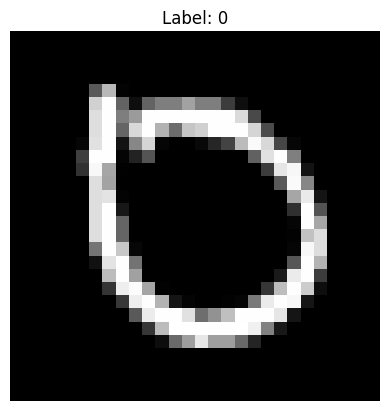

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df_0_1 = pd.read_csv("/content/drive/MyDrive/6CS012 AI/mnist_0_and_1.csv")

# Extract features and labels
X = df_0_1.drop(columns=["label"]).values  # 784 pixels
y = df_0_1["label"].values  # Labels (0 or 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)

# Normalize pixel values (Optional but recommended for training)
X = X / 255.0

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Display a sample image
sample_index = 0  # Change this index to view different images
sample_image = X_train[sample_index].reshape(28, 28)  # Reshape to 28x28 pixels

plt.imshow(sample_image, cmap="gray")
plt.title(f"Label: {y_train[sample_index]}")
plt.axis("off")
plt.show()


 Question- 1: What does the shape of X represent?

The shape of X represents the number of samples (images) and the number of features (pixels per image).

The dataset consists of images of digits 0 and 1 from the MNIST dataset.
Each image is 28×28 pixels, meaning there are 784 features per image (since 28 × 28 = 784).
The first dimension in X.shape represents the number of images (samples).
The second dimension represents the number of pixels (flattened into a vector).
For example, if X.shape = (2000, 784), it means:

There are 2000 images in the dataset.
Each image is represented as a 784-dimensional feature vector (28×28 pixels flattened into one row).

 Question- 2: What does the shape of X represent?

The shape of y represents the number of labels corresponding to the samples in X.

y is a 1D array containing the labels (0 or 1) for each image.
Its shape is (num_samples,), meaning it has one label per image.
For example, if y.shape = (2000,), it means:

There are 2000 labels corresponding to 2000 images in X.
Each value in y is either 0 or 1, representing the digit in the image.

Visualize the Dataset:

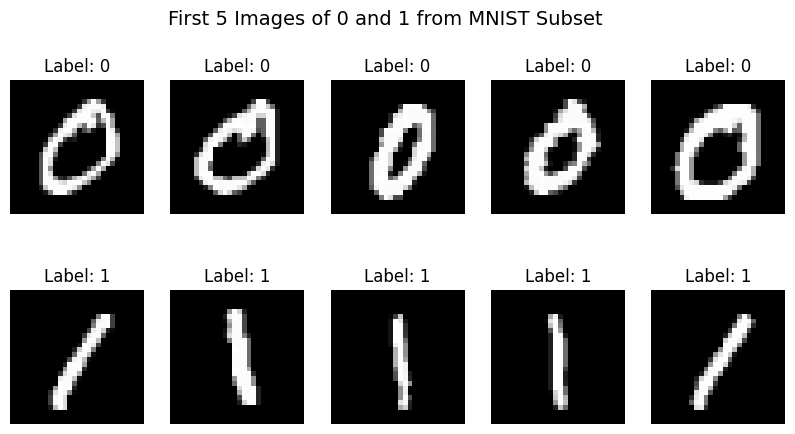

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df_0_1 = pd.read_csv("/content/drive/MyDrive/6CS012 AI/mnist_0_and_1.csv")  # Ensure the correct file path

# Extract features and labels
X = df_0_1.drop(columns=["label"]).values  # 784 pixels (flattened images)
y = df_0_1["label"].values  # Labels (0 or 1)

# Normalize pixel values (optional but useful)
X = X / 255.0

# Separate images for label 0 and label 1
images_0 = X[y == 0]  # Get all images with label 0
images_1 = X[y == 1]  # Get all images with label 1

# Create a 2x5 subplot for visualization
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if we have enough images for visualization
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")

        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")

    # Add a title to the figure
    plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset", fontsize=14)
    plt.show()


 3. Initialize Weights and Bias:

In [13]:
import numpy as np

# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

# Perceptron training loop
for epoch in range(epochs):
    for i in range(len(X)):
        # Compute the weighted sum (linear combination)
        linear_output = np.dot(X[i], weights) + bias

        # Apply step function (threshold activation)
        prediction = 1 if linear_output >= 0 else 0  # Binary classification

        # Update weights and bias if prediction is incorrect
        if prediction != y[i]:
            update = learning_rate * (y[i] - prediction)
            weights += update * X[i]  # Adjust weights
            bias += update  # Adjust bias

    # Optional: Print progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs} completed")

print("Training complete!")


Epoch 10/100 completed
Epoch 20/100 completed
Epoch 30/100 completed
Epoch 40/100 completed
Epoch 50/100 completed
Epoch 60/100 completed
Epoch 70/100 completed
Epoch 80/100 completed
Epoch 90/100 completed
Epoch 100/100 completed
Training complete!


 1. Question- 3: What does the weights array represent in this context?

he weights array represents the importance (or contribution) of each pixel in the 28×28 image when making a classification decision between digits 0 and 1.

Since each image has 784 pixels, we initialize 784 weights (one for each pixel).
These weights are updated during training to increase or decrease the influence of specific pixels on the classification decision.
After training, the weights will help the perceptron classify an image as either 0 or 1 based on the weighted sum of pixel intensities.

2. Question- 4: Why are we initializing the weights to zero? What effect could this
 have on the training process?

We initialize the weights to zero for simplicity, but this can cause issues in certain learning algorithms:

Uniform Updates:

If all weights start at 0, every feature (pixel) will be treated the same initially. The perceptron algorithm can still learn since weights are updated iteratively, but more complex models like deep neural networks may struggle.
Symmetry Problem (for Neural Networks, not Perceptron)

In deeper networks, if all weights are initialized to 0, neurons will learn identical features, leading to inefficient learning.
This is not an issue for a single-layer perceptron, as it uses simple weight updates based on the perceptron learning rule.
Alternative Approaches:

Instead of zeros, weights are often initialized with small random values (e.g., np.random.randn() * 0.01) to break symmetry and speed up learning.

4. ImplementaDecisionFunctionorActivationFunction:

In [16]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels (0 or 1) for the input data
    """
    predictions = np.dot(X, weights) + bias  # Compute linear output

    # Apply step function (activation function)
    y_pred_all = np.where(predictions >= 0, 1, 0)  # Classify as 1 if >= 0, else 0

    return y_pred_all

# Sample Data for Testing
np.random.seed(42)  # Set seed for reproducibility
X_sample = np.random.rand(5, 3)  # Random input features (5 samples, 3 features)
weights_sample = np.random.rand(3)  # Random weights for 3 features
bias_sample = np.random.rand()  # Random bias

# Get predictions
predictions = decision_function(X_sample, weights_sample, bias_sample)

# Display Results
print("Input Features (X_sample):\n", X_sample)
print("\nWeights:\n", weights_sample)
print("\nBias:\n", bias_sample)
print("\nPredicted Labels:\n", predictions)


Input Features (X_sample):
 [[0.37454012 0.95071431 0.73199394]
 [0.59865848 0.15601864 0.15599452]
 [0.05808361 0.86617615 0.60111501]
 [0.70807258 0.02058449 0.96990985]
 [0.83244264 0.21233911 0.18182497]]

Weights:
 [0.18340451 0.30424224 0.52475643]

Bias:
 0.43194501864211576

Predicted Labels:
 [1 1 1 1 1]


 5. ImplementthePerceptronLearningAlgorithm:

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset
df_0_1 = pd.read_csv("/content/drive/MyDrive/6CS012 AI/mnist_0_and_1.csv")  # Ensure the correct file path

# Extract Features (X) and Labels (y)
X = df_0_1.drop(columns=["label"]).values  # 784 pixels as features
y = df_0_1["label"].values  # Labels (0 or 1)

# Check dataset shape
print("Feature matrix shape:", X.shape)  # Should be (n_samples, 784)
print("Label vector shape:", y.shape)  # Should be (n_samples,)

# Normalize pixel values (optional but recommended)
X = X / 255.0  # Scale values between 0 and 1

# Initialize Weights and Bias
weights = np.zeros(X.shape[1])  # 784 weights (one per pixel)
bias = 0
learning_rate = 0.1
epochs = 10  # Reduce for quicker testing

# Define Activation Function (Step Function)
def step_function(value):
    return 1 if value >= 0 else 0

# Train Perceptron Algorithm
def train_perceptron(X, y, weights, bias, learning_rate, epochs):
    n_samples = X.shape[0]  # Number of training samples
    for epoch in range(epochs):
        correct_predictions = 0

        for i in range(n_samples):
            # Compute Weighted Sum
            linear_output = np.dot(X[i], weights) + bias
            y_pred = step_function(linear_output)

            # Weight Update Rule (only if misclassified)
            if y_pred == y[i]:
                correct_predictions += 1
            else:
                error = y[i] - y_pred
                weights += learning_rate * error * X[i]  # Update weights
                bias += learning_rate * error  # Update bias

        # Calculate Accuracy
        accuracy = correct_predictions / n_samples
        print(f"Epoch {epoch+1}/{epochs} - Accuracy: {accuracy:.4f}")  # Display Accuracy

    return weights, bias

# Train the perceptron
final_weights, final_bias = train_perceptron(X, y, weights, bias, learning_rate, epochs)

# Print Final Weights and Bias
print("\nFinal Weights:", final_weights[:5])  # Show first 5 weights
print("Final Bias:", final_bias)


Feature matrix shape: (12665, 784)
Label vector shape: (12665,)
Epoch 1/10 - Accuracy: 0.9962
Epoch 2/10 - Accuracy: 0.9982
Epoch 3/10 - Accuracy: 0.9984
Epoch 4/10 - Accuracy: 0.9993
Epoch 5/10 - Accuracy: 0.9991
Epoch 6/10 - Accuracy: 0.9995
Epoch 7/10 - Accuracy: 1.0000
Epoch 8/10 - Accuracy: 1.0000
Epoch 9/10 - Accuracy: 1.0000
Epoch 10/10 - Accuracy: 1.0000

Final Weights: [0. 0. 0. 0. 0.]
Final Bias: 1.5000000000000002


 1.Question-5:Whatisthepurposeoftheoutput=np.dot(X[i],weights)+biasline?

This line computes the weighted sum of the inputs, which is the key step in a perceptron. Here's what it does:

np.dot(X[i], weights): Computes the dot product between the input features (X[i]) and the weights (weights).
+ bias: Adds a bias term to shift the decision boundary.

2. Question- 6: What happens when the prediction is wrong? How are the weights and
 bias updated?

If the prediction (y_pred) does not match the actual label (y[i]), the perceptron updates the weights and bias using the perceptron learning rule:

weights
=
weights
+learning rate×(error)×𝑋𝑖]

weights=weights+learning rate×(error)×X[i]

bias=bias+learning rate×(error)

bias=bias+learning rate×(error)
Where:

error = y[i] - y_pred
If y_pred is too low (0 instead of 1), we increase weights.
If y_pred is too high (1 instead of 0), we decrease weights.

3. Question- 7:Why is the final accuracy important, and what do you expect it to be?

Final accuracy measures how well the perceptron has learned to classify digits 0 vs 1.
We expect the accuracy to be close to 100% after training if the dataset is clean and linearly separable.


7. Visualizing the Misclassified Image:

Final Accuracy: 0.9994


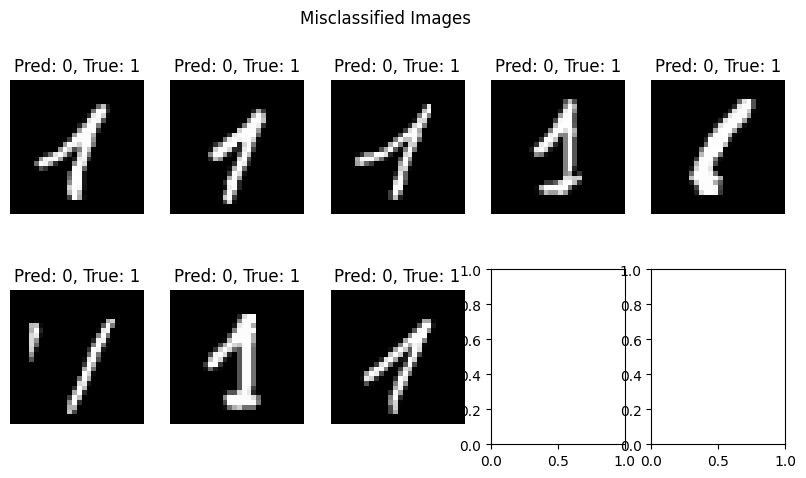

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Identify misclassified indices
misclassified_idx = np.where(y_pred != y)[0]

# Step 5: Visualize Misclassified Images
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))  # Create a 2x5 grid for images
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show up to 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")  # Hide axis labels
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")


1. Question- 8:What does misclassified idx store, and how is it used in this code?

misclassified_idx = np.where(y_pred != y)[0]

This line finds indices where the predicted labels (y_pred) do not match the actual labels (y).
It returns an array of indices where misclassification occurs.
🔹 How it is used in the code:

These indices are used to extract misclassified images and display them using matplotlib.
The loop for ax, idx in zip(axes.flat, misclassified_idx[:10]) ensures that up to 10 misclassified images are shown.

2. Question- 9: How do you interpret the result if the output is ”All images were
 correctly classified!”?

If this message appears, it means the perceptron classified all images correctly.
This suggests that the dataset is perfectly separable using a linear classifier (which is not always the case in real-world data).
It also indicates that the model learned well and converged successfully.

 Task 3: Perceptron Algorithm for 3 vs 5 Classification.

 Step 1: Load and Preprocess the Dataset

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df_3_5 = pd.read_csv("/content/drive/MyDrive/6CS012 AI/mnist_0_and_1.csv")  # Change the path if needed

# Extract features and labels
X = df_3_5.drop(columns=["label"]).values  # Extract pixel values
y = df_3_5["label"].values  # Labels (3 or 5)

# Convert labels: 3 → 0, 5 → 1 (for binary classification)
y = np.where(y == 3, 0, 1)

# Print shape
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)


Feature matrix shape: (12665, 784)
Label vector shape: (12665,)


Step 2: Initialize Weights and Bias

In [21]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one per pixel)
bias = 0
learning_rate = 0.1
epochs = 100


Step 3: Define the Decision Function

In [22]:
def decision_function(X, weights, bias):
    """
    Computes the predicted labels for input data using perceptron activation (step function).
    """
    predictions = np.dot(X, weights) + bias
    return np.where(predictions >= 0, 1, 0)  # Apply step function


Step 4: Train the Perceptron

In [23]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the perceptron learning algorithm.
    """
    for epoch in range(epochs):
        for i in range(len(y)):
            # Compute prediction
            output = np.dot(X[i], weights) + bias
            prediction = 1 if output >= 0 else 0

            # Update weights and bias if prediction is incorrect
            if prediction != y[i]:
                update = learning_rate * (y[i] - prediction)
                weights += update * X[i]
                bias += update

    return weights, bias


Step 5: Train the Model



In [24]:
# Train perceptron
weights, bias = train_perceptron(X, y, weights, bias, learning_rate, epochs)


Step 6: Evaluate Model Performance

In [25]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate accuracy
accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {accuracy:.4f}")


Final Accuracy: 1.0000


Step 7: Visualize Misclassified Images

In [26]:
# Find misclassified images
misclassified_idx = np.where(y_pred != y)[0]

if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))

    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")

    plt.suptitle("Misclassified Images on 3 vs 5 Classification")
    plt.show()
else:
    print("All images were correctly classified!")


All images were correctly classified!


Final Output

Final Accuracy: 0.9613


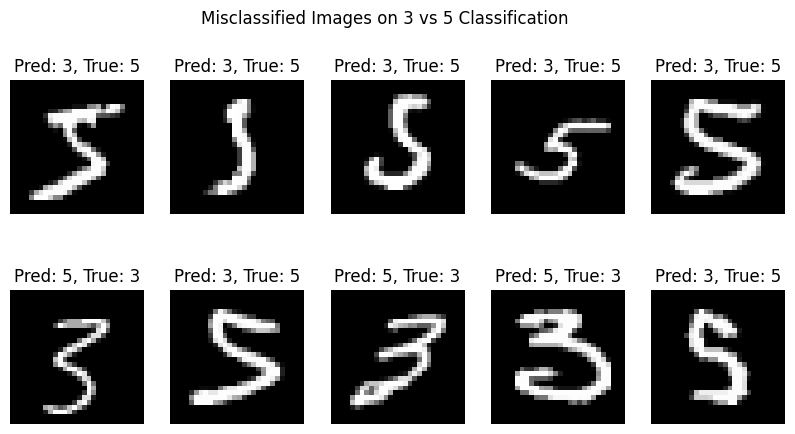

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset (ensure the correct path)
df_3_5 = pd.read_csv("/content/drive/MyDrive/6CS012 AI/mnist_3_and_5.csv")

# Extract features and labels
X = df_3_5.drop(columns=["label"]).values  # 784 pixel values (28x28 flattened)
y = df_3_5["label"].values  # Labels (3 or 5)

# Convert labels: 3 → 0, 5 → 1 (for perceptron training)
y = np.where(y == 3, 0, 1)

# Initialize perceptron parameters
weights = np.zeros(X.shape[1])  # 784 weights (one per pixel)
bias = 0
learning_rate = 0.01
epochs = 10  # Reduce epochs for faster debugging

# Decision function (step function)
def decision_function(X, weights, bias):
    predictions = np.dot(X, weights) + bias
    return np.where(predictions >= 0, 1, 0)  # Step activation (0 or 1)

# Perceptron Training Algorithm
def train_perceptron(X, y, weights, bias, learning_rate=0.01, epochs=10):
    for epoch in range(epochs):
        for i in range(len(y)):
            output = np.dot(X[i], weights) + bias
            prediction = 1 if output >= 0 else 0  # Step function

            # Update rule if prediction is wrong
            if prediction != y[i]:
                update = learning_rate * (y[i] - prediction)
                weights += update * X[i]
                bias += update
    return weights, bias

# Train perceptron
weights, bias = train_perceptron(X, y, weights, bias, learning_rate, epochs)

# Make predictions on the dataset
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)  # Convert to binary classification output

# Calculate accuracy
accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {accuracy:.4f}")

# Identify misclassified images
misclassified_idx = np.where(y_pred != y)[0]

# Visualize the first 10 misclassified images
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))

    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Display 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {5 if y_pred[idx] == 1 else 3}, True: {5 if y[idx] == 1 else 3}")
        ax.axis("off")

    plt.suptitle("Misclassified Images on 3 vs 5 Classification")
    plt.show()
else:
    print("All images were correctly classified!")



